# ***Performance Analysis***

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the file and extract top 5 rows
football_data=pd.read_csv("/content/Football_data_merged_cleaned_data (3).csv")
football_data.head()

,appearance_id,game_id_x,player_id_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name_y,team_captain,position_y
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,8d717b1017e72d89d2ee1112bb2d7466,substitutes,22,Timothy Chandler,0,Right-Back
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,d53eb3fd74523d6dd4536653c145ae96,substitutes,22,Timothy Chandler,0,Right-Back
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,3efc21c645e46b2f411bcdb1710aa444,substitutes,22,Timothy Chandler,0,Right-Back
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,cc79e78c570ce19872dfed125d324407,substitutes,22,Timothy Chandler,0,Right-Back
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,186.0,700000.0,5000000.0,2025-06-30 00:00:00.000000000,21de58902f547e231bf2604be9fa996f,substitutes,22,Timothy Chandler,0,Right-Back


In [ ]:
#check columns
football_data.columns

Index(['appearance_id', 'game_id_x', 'player_id_x', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'player_id', 'name',
       'last_season', 'current_club_id', 'player_code', 'country_of_birth',
       'date_of_birth', 'sub_position', 'position_x', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'game_lineups_id', 'type_y', 'number',
       'player_name_y', 'team_captain', 'position_y'],
      dtype='object')

In [ ]:
#covert file into dataframe
df = pd.DataFrame(football_data)

**Question 1:**Which are the top 10 players based on goals scored?

<ipython-input-5-3bb8bdd2b328>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_goals.values, y=top_goals.index, palette='viridis')


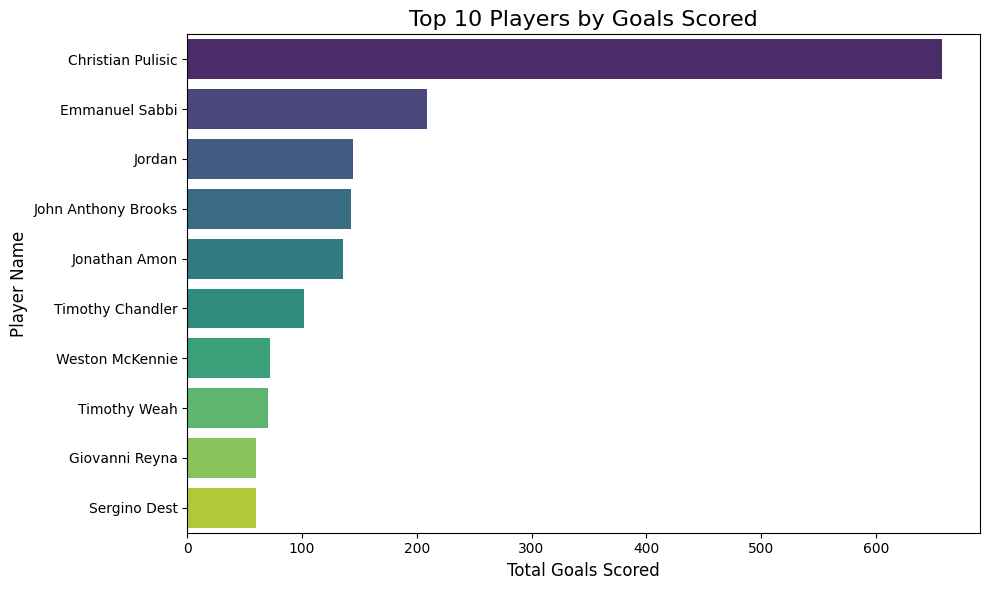

In [ ]:
#visulization:
# Group the data by player and sum up the goals for each player
top_goals = football_data.groupby('player_name_y')['goals'].sum().sort_values(ascending=False).head(10)

# Create a bar chart for the top 10 players by goals scored
plt.figure(figsize=(10, 6))
sns.barplot(x=top_goals.values, y=top_goals.index, palette='viridis')

# Set labels and title
plt.title("Top 10 Players by Goals Scored", fontsize=16)
plt.xlabel("Total Goals Scored", fontsize=12)
plt.ylabel("Player Name", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Interpretation:** **Christian Pulisic**  significantly outperforms other players, scoring over 600 goals. This suggests he's a highly prolific scorer.


**Question 2:**Which are the top 10 players based on assists?

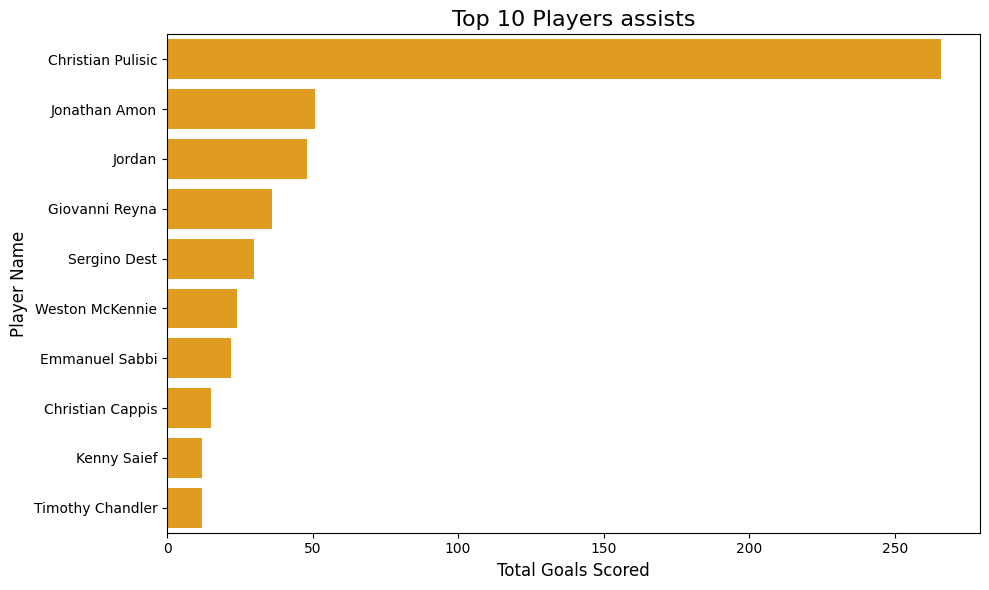

In [ ]:
#visulization:
# Group the data by player and sum up the goals for each player
top_assists = football_data.groupby('player_name_y')['assists'].sum().sort_values(ascending=False).head(10)

# Create a bar chart for the top 10 players by goals scored
plt.figure(figsize=(10, 6))
sns.barplot(x=top_assists.values, y=top_assists.index, color ='orange')

# Set labels and title
plt.title("Top 10 Players assists", fontsize=16)
plt.xlabel("Total Goals Scored", fontsize=12)
plt.ylabel("Player Name", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Interpretation: Christian Pulisic** stands out as the top assist provider, significantly outperforming the other players. This suggests he plays a pivotal role in creating scoring opportunities for his team.


**Question3:**What is the distribution of goals scored by players across different positions?

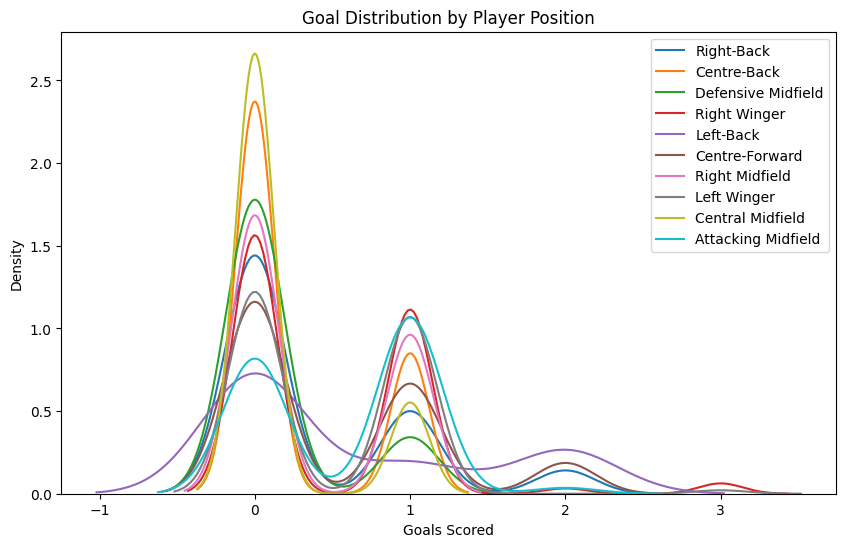

In [ ]:
#Normal Distribution
plt.figure(figsize=(10, 6))
for position in football_data['position_y'].unique():
    subset = football_data[football_data['position_y'] == position]['goals']
    sns.kdeplot(subset, label=position)

plt.title('Goal Distribution by Player Position')
plt.xlabel('Goals Scored')
plt.ylabel('Density')
plt.legend()
plt.show()

**Interpretation: ** Attackers Score More Goals: Players in attacking positions (e.g., Centre-Forward, Right Winger, Left Winger) tend to score more goals, as evidenced by the peaks of their curves shifting towards higher goal counts.
Defensive Positions Score Less: Players in defensive positions (e.g., Right-Back, Centre-Back, Defensive Midfield) tend to score fewer goals, as indicated by the peaks of their curves being closer to zero.
Midfielders' Scoring: Midfielders have a more varied distribution, with some scoring more goals (e.g., Attacking Midfield) and others scoring fewer (e.g., Defensive Midfield).

**Question 4:**What is the average number of goals scored by players in different positions?

In [ ]:
#Descriptive analysis
# Calculate the average number of goals scored by players in different positions
average_goals_by_position = football_data.groupby('position_y')['goals'].mean()

# Display the results
print(average_goals_by_position)

position_y
Attacking Midfield    0.592593
Central Midfield      0.171756
Centre-Back           0.263525
Centre-Forward        0.515815
Defensive Midfield    0.161290
Left Winger           0.489552
Left-Back             0.606742
Right Midfield        0.363363
Right Winger          0.492494
Right-Back            0.375385
Name: goals, dtype: float64


**Interpretation: **Left-Back,Attacking Midfield,Centre-Forward these positions have higher average number of goals

# ***Sampling and Distribution***

**Question5:**How does the average playing time of players in our sample compare to the average playing time for all players?

sample mean:63.76
population_mean:62.82


<function matplotlib.pyplot.show(close=None, block=None)>

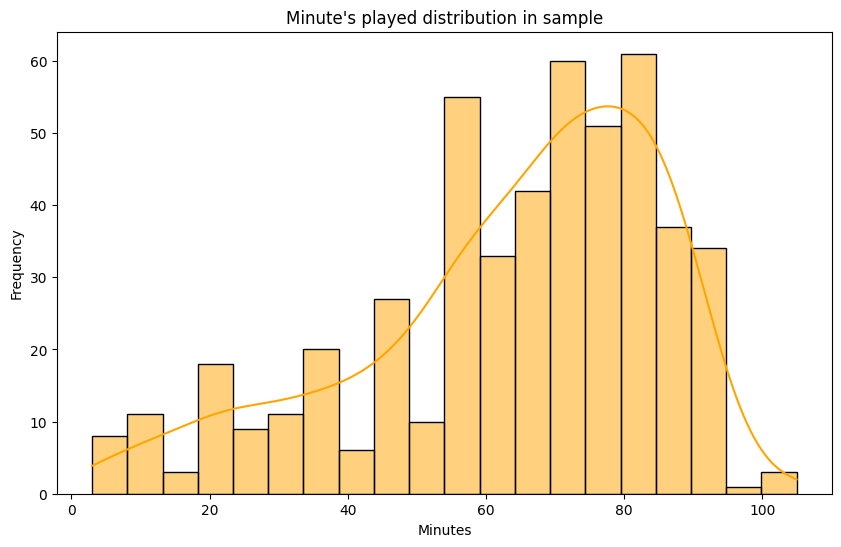

In [ ]:
sample_size = 500
sample = df.sample(n=sample_size,random_state=30)
sample_mean = sample['minute'].mean()

#population mean comparison
population_mean = df['minute'].mean()
print(f"sample mean:{sample_mean:.2f}")
print(f"population_mean:{population_mean:.2f}")
#visualize sample distribution
plt.figure(figsize=(10,6))
sns.histplot(sample['minute'],kde=True,bins=20,color='Orange')
plt.title("Minute's played distribution in sample")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show


**InterPretation:Skewed Distribution:** The distribution is positively skewed, indicating that a majority of players play fewer minutes, with a few players playing significantly more.
Peak Around 60-70 Minutes: The highest frequency of players falls within the 60-70 minute range, suggesting that this is a common playing time for many players.
Sample Mean: 63.76 minutes
Population Mean: 62.82 minutes The sample mean is slightly higher than the population mean, suggesting that the sample may have a higher proportion of players with longer playing times.

In [ ]:
#CENTRAL TENDENCIES
sample_mean = sample['minute'].mean()
sample_median = sample['minute'].median()
population_mean = df['minute'].mean()
population_median= df['minute'].median()
print(f"The Population mean:{population_mean:.2f}and Sample Mean: {sample_mean:.2f}")
print(f"The Population median:{population_median:.2f}and Sample Median: {sample_median:.2f}")

The Population mean:62.82and Sample Mean: 63.76
The Population median:68.00and Sample Median: 69.00


**Interpretation:**Mean: The average number of minutes played in the population is 62.82, while the average in the sample is slightly higher at 63.76. This suggests that the sample might have a slightly higher proportion of players with longer playing times.
Median: The median number of minutes played in the population is 68, while the median in the sample is 69. This indicates that half of the players in both the population and the sample play less than 68-69 minutes, and half play more.

In [ ]:
sample_kurtosis = sample['minute'].kurt()
sample_skewness = sample['minute'].skew()
population_kurtosis = df['minute'].kurt()
population_skewness= df['minute'].skew()
print(f"The Population kurtosis:{population_kurtosis:.2f}and Samplekurtosis: {sample_kurtosis:.2f}")
print(f"The Population skewness:{population_skewness:.2f}and Sample skewness: {sample_skewness:.2f}")

The Population kurtosis:-0.19and Samplekurtosis: 0.08
The Population skewness:-0.76and Sample skewness: -0.88


**Interpretation:**Kurtosis:
A negative kurtosis value indicates a platykurtic distribution, which is flatter than a normal distribution.
The population has a slightly more platykurtic distribution compared to the sample.
Skewness:
A negative skewness value indicates a left-skewed distribution, where the tail is longer on the left side.
Both the population and sample distributions are left-skewed, indicating that most players play fewer minutes, with a few playing significantly more.

# **Probability**
**Conditional probability**

In [ ]:
#Calculates the probability of a player scoring a goal given that they played at least 65 minutes in a match?
#probability that a player scores a goal given that they played at least 65 minutes
df['scored_goal']=df['goals']>0
df['played_65minutes']=df['minutes_played']>=65
#conditional probability : P(scored goal / played 65+ minutes)
prob_scored_given_65_minutes =df[df['played_65minutes']]['scored_goal'].mean()
print(f"probability of scoring a goal given that at least 65 minutes plyaed:{prob_scored_given_65_minutes:.2f}")

probability of scoring a goal given that at least 65 minutes plyaed:0.43


**Interpretation:**The probability of scoring a goal, given that at least 65 minutes have been played, is 0.43, meaning there is a 43% chance of scoring a goal after 65 minutes of play.



**Joint Probability**

In [ ]:
#Calculates the probability of a player both scoring a goal and making an assist in the same match?
#probability that a palyer scores a goal and makes an assist the same match
df['made_assist']=df['assists']>0
joint_prob_goal_assist = len(df[(df['scored_goal'])&(df['made_assist'])])/len(df)
print(f"joint probability of scoring a goal and making an assist:{joint_prob_goal_assist:.2f}")

joint probability of scoring a goal and making an assist:0.06


**Interpreation:**Probability of 0.06: This indicates a 6% chance that a player will both score a goal and make an assist in a single match.


                        goals   assists  yellow_cards  minutes_played  \
goals                1.000000  0.089989      0.013522        0.194889   
assists              0.089989  1.000000     -0.092310        0.086878   
yellow_cards         0.013522 -0.092310      1.000000        0.123340   
minutes_played       0.194889  0.086878      0.123340        1.000000   
market_value_in_eur  0.091787  0.173245     -0.121567        0.077168   

                     market_value_in_eur  
goals                           0.091787  
assists                         0.173245  
yellow_cards                   -0.121567  
minutes_played                  0.077168  
market_value_in_eur             1.000000  


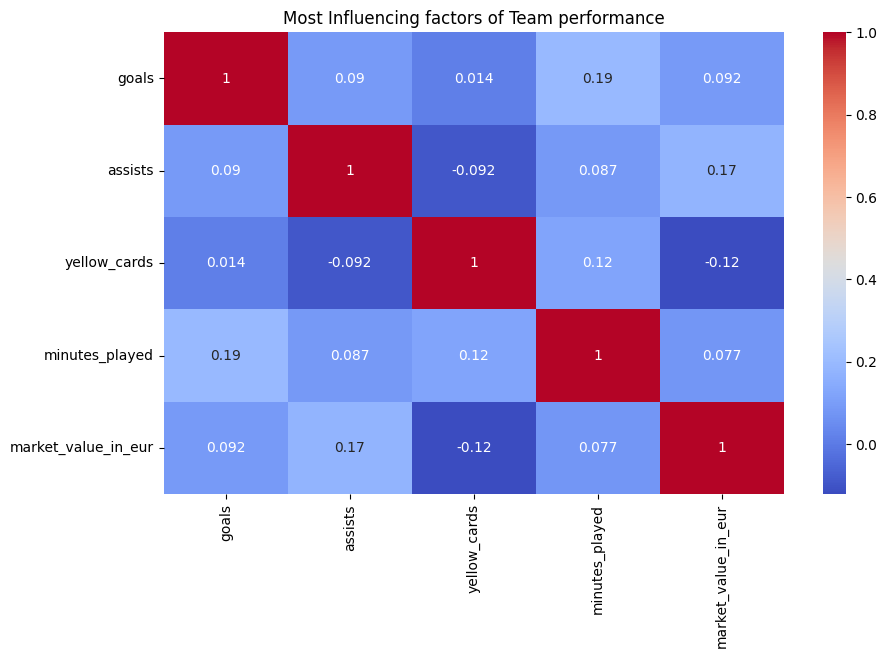

,goals,assists,yellow_cards,minutes_played,market_value_in_eur
goals,1.000000,0.089989,0.013522,0.194889,0.091787
assists,0.089989,1.000000,-0.092310,0.086878,0.173245
yellow_cards,0.013522,-0.092310,1.000000,0.123340,-0.121567
minutes_played,0.194889,0.086878,0.123340,1.000000,0.077168
market_value_in_eur,0.091787,0.173245,-0.121567,0.077168,1.000000


In [ ]:
#Key factors influencing team performance
def analyze_team_performance():
   #we take relevant factors influencing team performance
   performance_factors = ['goals','assists','yellow_cards','minutes_played','market_value_in_eur']

   correlation_matrix=df[performance_factors].corr()
   print(correlation_matrix)

   #plot heatmap to show the correlation
   plt.figure(figsize=(10,6))
   sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
   plt.title("Most Influencing factors of Team performance")
   plt.show()
   return correlation_matrix
analyze_team_performance()

**Interpretation:**Goals and Assists: There's a strong positive correlation between goals and assists, indicating that teams with more goals tend to have more assists.
Negative Correlations:
Yellow Cards and Goals: There's a weak negative correlation between yellow cards and goals. This might indicate that teams with more disciplined players tend to score more goals.
Weak Correlations:
The correlations between variables like yellow cards, minutes played, and market value with other variables are relatively weak. This suggests that these factors might not be as strongly correlated with team performance as goals and assists.